This week's focus is basically how to play around with dataframe datatype. How to summarize, how to visualise, how to generally make sense of the data that you are given

In [21]:
#We start with loading the dataframe form the sklearn.datasets method
from sklearn.datasets import load_iris
import pandas as pd # Manipulating the dataframe in the dataframe type. There are instances, however, when we cannot operate on this data in the dataframe type so we convert it into a numpy array
import numpy as np #Performs the operation on the converted array

In [22]:
data = load_iris()
print(type(data)) # actually returns <class 'sklearn.utils._bunch.Bunch'>. It is the class within the data is contained. This has to be converted to a dataframe now using the pd
df = pd.DataFrame(data.data, columns = data.feature_names)#This is a very smart way that I am not primed to understand but basically, this data.data is reading into the datafile and extracting a class called data, then extracting the class containing the feature names of these flowers and assigning them as the column names. And I am sure it can do even more. Worth finding out later
df

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
#Now there is a method that can get general visualisation of the data - a description of sorts
df.describe() #This computes the count, the mean, the standard deviation, the percentiles for each column and returns them in a table format. You could save this as a new dataset the save it as a pdf or excel on its own

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
Y = np.random.seed(10) # so this generates 10 random probabilities for the next number which the random normal has to pick one from. The higher the see input, the more random the process
X = np.random.normal(3, 2.2, size = 10000) #Now we are calling 10,000 random numbers with a mean of 3 and standard deviation of 2.2
print(len(X)) #10000 as in 10000 datapoints
print(Y) #returns None which is what it returns because it is a function that saves the data not to be printed but to be used by another method.


10000
None


In [25]:
#Now since we generated our data using numpy, it is a numpy array type and we can apply a couple of different methods on them
print(f"Empirial mean is {X.mean()}") # returns Empirial mean is 3.0112245232042127
print(f"The standard deviation is {X.std()}") #returns The standard deviation is 2.177260828097729
#This is to tell us that we can compute mean and standard deviation in the numpy field with these two methods. There are many others up for research

Empirial mean is 3.0112245232042127
The standard deviation is 2.177260828097729


In [26]:
#There are certain methods that numpy does not have that can be obtain from other libraries. In this example, we want to calculate skewness but this can be found in scipy.stats has a method called skew. Luckily, it can work on numpy data so no need for conversion again
from scipy.stats import skew  
skew(X) # returns -0.028247129262426673

#The meaning of skew. With normal distribution, you expect for the data's mean to be placed at the center - at the crest of the bell curve. Sometimes, however, this is not the case. For example, data containing peoples earnings might result in the hump moving to the right of the mean. The question to ask, however, is this: how has the mean moved relative to the hump? In this casem the mean moved the the left and the hump is to the right and by 0.028 steps. I am guessing that this number would change every time we run this algorithm
#Source: https://www.youtube.com/watch?v=XSSRrVMOqlQ

-0.028247129262426673

In [31]:
#The next thing we look at is the Pearson's correlation coefficient. There is a very nice video that explains what the correlation coefficient means. https://www.youtube.com/watch?v=xZ_z8KWkhXE
#Basically, the closer the correlation coefficient is to 1, the more strongly related the data is. However, this is more likely to be true with larger datasets as it is easier to obtain a straight line connecting two dots compared to a straight line connecting 1000 random dots

#Let's start by creating a new variable
Y = 5*X -2 #This follows a straight line with a gradient of 5. Note that even though the gradient is 5, the correlation coefficient will still be 1. It is not a measure of the steepness, it is a measure of how many of the available correlational dots are connected if a line were to be drawn through the points. 100% dot connection results in coefficient of 1
corrs = np.corrcoef(X,Y)
print(corrs)
#This returns a 2 by 2 numpy array. This is how you make sense of this: imagine we created a table and named the columns the variables - X, Y (from index 0 to 1). The same happens with the rows (X, Y) from index 0 to 1. Index 0,0, therefore, shows the correlation between X and X, 0,1 between X and Y, 1,0 between Y and X (which is the same as X and Y) and 1,1 between Y and Y. Hence, we can either use the 0,1 index or the 1,0 index.

#This is how we extract that:
print(corrs[0,1]) # when printed, it returns 0.99999 which is the 1 that see.

[[1. 1.]
 [1. 1.]]
0.9999999999999999


In [35]:
#You could alternatively do the same in the pandas domain. Note that the previous one happened in the numpy domain
#First, convert the data into a dataframe
df = pd.DataFrame({'X':X, 'Y':Y}) # This converts a dataframe of two columns (and an index column as well) and labels the columns X and Y while doing the appropriate assignment
df.corr() # When run, this returns a 2 by 2 matrix similar to the previous one whose interpretation is the same. Source: https://www.youtube.com/watch?v=TRNaMGkdn-A (2.51)

,X,Y
X,1.0,1.0
Y,1.0,1.0


In [37]:
#Now trying that with random variables that have no correlation
np.random.seed(67) # note that we have increased the seed size to increase the randomness further
Z = np.random.uniform(5, 3.2, size = 10000)
df_uncorelated = pd.DataFrame({"X": X, "Z": Z})
df_uncorelated.corr()
#When run, this makes more visual sense

#         X           Z
# X	1.000000	-0.013475
# Z	-0.013475	1.000000
#This is the table it returns and you are able to visualise better what it is that you are working with

,X,Z
X,1.000000,-0.013475
Z,-0.013475,1.000000


In [38]:
#Alternative option is working in the numpy domain
print(np.corrcoef(X, Z))
# [[ 1.         -0.01347469]
#  [-0.01347469  1.        ]]
#Above is the function's output

[[ 1.         -0.01347469]
 [-0.01347469  1.        ]]


In the next section, our focus is on how to visualise the data better. For this, we use the matplotlib library

In [39]:
from matplotlib import pyplot as plt
#alternatively, you could say, import matplotlib.pyplot as plt. Does the same thing

#Then we set the parameters for whatever image/ plot we are going to generate
plt.rcParams.update(
    {
        "lines.markersize": 10, #worth checking what this does
        "font.size": 15, #obviously this sets the font size. But for what? Font or title or both
        "xtick.major.size": 5, #setting xticks
        "ytick.major.size": 5, #note how all of them have commas at the end to mark the end of the instruction
        #Also, thinking about it, this is a dictionary. So it seems like matplotlib has a dictionary set but what are doing is updating it. Might be worth checking what other parameters are in this dictionary that we could update
            
    }
)

C:\Users\User\AppData\Local\Temp\ipykernel_16516\1898959482.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = 'on')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'awful'),
  Text(1, 0, 'really bad'),
  Text(2, 0, 'bad,'),
  Text(3, 0, 'okay'),
  Text(4, 0, 'pretty okay,good')])

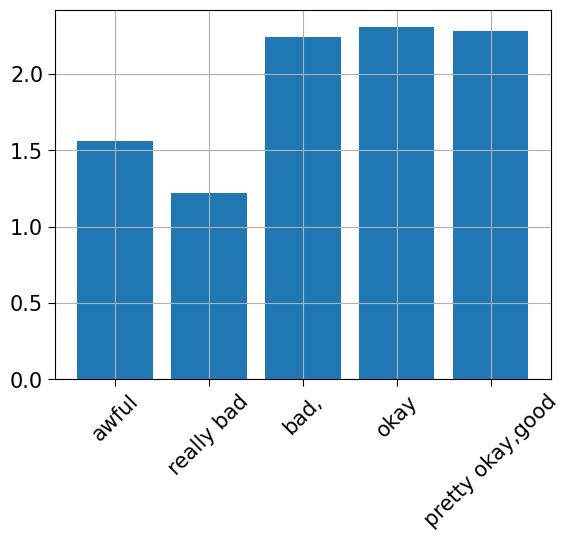

In [48]:
#Given that we are trying to maintain that OOP approach, it is best we use the fig, ax which returns two objects - the figure, and the axes. There are various methods that we could apply on either the fig or the axes which we are going to play with below

fig, ax = plt.subplots() # we are creating the objects now
#ax.bar(X, Z) # this automatically plots. What we are doing here is we are specifying that on the empty figure that you had created, plot the X values on the x axis (the first argument) and the Z values on the y axis (the second argument). The .bar is specifying what kind of chart we want to create.

#The X and Z data are just too large - takes long to plot - so let's try generate new data that won't be that long

A = ['awful', 'really bad', 'bad,', 'okay', 'pretty okay,' 'good']
B = np.random.uniform(3, 1.2, size = len(A))
ax.bar(A, B)
#Let's take it an extra step and see how to twist the x labels to be tilted at an angle
plt.grid(b = 'on')
plt.xticks(rotation = 45) # These work for now but I am pretty sure that there is better ways to do this using the ax object. As per the website, this is the stateful approach which is not recommended. Always, where possible, use the object oriented approach

C:\Users\User\AppData\Local\Temp\ipykernel_16516\2868472578.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(A, rotation=30, ha='center') # This is how you set it. The first argument is the list that is being used on that axis. What are we to pick as the labels? The rest we can set as we go on


[Text(0, 0, 'awful'),
 Text(1, 0, 'really bad'),
 Text(2, 0, 'bad,'),
 Text(3, 0, 'okay'),
 Text(4, 0, 'pretty okay,good')]

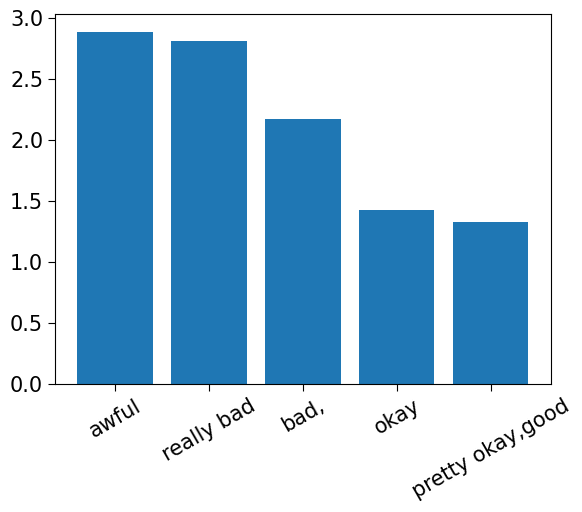

In [51]:
fig, ax = plt.subplots() 
A = ['awful', 'really bad', 'bad,', 'okay', 'pretty okay,' 'good']
B = np.random.uniform(3, 1.2, size = len(A))
ax.bar(A, B)
ax.set_xticklabels(A, rotation=30, ha='center') # This is how you set it. The first argument is the list that is being used on that axis. What are we to pick as the labels? The rest we can set as we go on. The ha shows where the wording should appear with respect to the lines that point to the middle of the chart in the x axis. Options include center, right, left

There are different methods of data visualisation. Some of them are in the matplotlib class while others can be found in other classes. The next one we are going to look into is histogram

200
[66.65278255 70.48225273 72.87114503 73.8308498  62.14993851 71.38952707
 59.83504541 62.68413024 58.72479414 47.40205515 75.71430345 70.89762438
 66.85466701 67.97733734 74.24181403 68.06750501 60.21286324 83.54789846
 75.09356049 56.91804369 67.80036345 71.77047297 67.80953766 53.54664365
 63.8889678  64.68551995 57.81220783 63.92479935 65.81926793 56.98982322
 63.19215072 71.04834625 60.99286209 54.82733004 60.49258062 60.85955502
 48.61376686 76.46722683 71.15817658 61.9758318  64.81936003 63.13310205
 61.03107728 57.11282347 59.69222399 64.84349653 55.26091202 61.6894383
 67.28415873 57.74727509 68.96751286 68.37960725 64.34553282 58.5162055
 55.53911194 73.04936202 61.93411097 85.54932282 58.07661976 60.63168916
 57.00227714 64.8414378  56.64662526 71.50870065 60.1955204  63.95227254
 73.44174626 52.05522277 80.71649622 67.69044757 68.84978273 74.18589283
 63.6680691  67.05071046 58.03248882 78.67517912 70.61745547 64.43858212
 57.13728084 67.22378386 75.11411978 48.12426492 

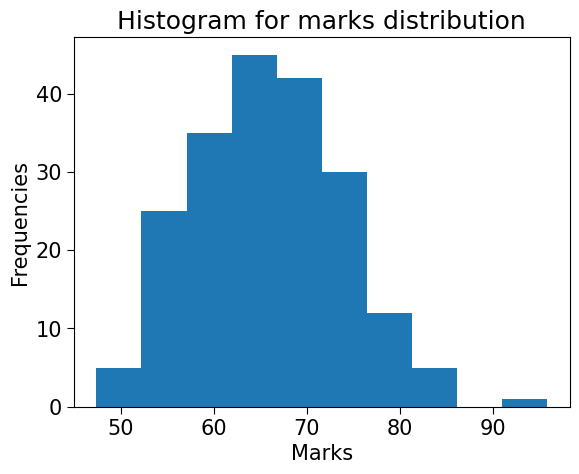

In [58]:
#As per the notes, they used the scipy library for the histogram. This is the same library from which we obtained the skew method. It seems like scipy, numpy, pandas, matplotlib, seaborn are some of the data visualisation tools
from scipy.stats import skewnorm # We are using this to generate skewed data. Unlike before where we used numpy to generate normalised data
bin_number = 10 #What bin number does is that it creates buckets of the data and rounds them up into a given value. If we have 100 datapoints and we have 5 bins, we will have four bar charts forming the histogram. The problem is that if you don't select the right bin number, you might up getting a histogram that is not a true reflection of the data distribution. Key resource on how to decide (there is no standard way to decide though, it is mostly just trial and error)
fig, ax = plt.subplots()
np.random.seed(5)
skewed_data = skewnorm.rvs(1, loc = 60, scale = 10, size = 200) # skewnorm is a method that skews normally distributed data (that is we still see the random seed thing going on to ensure random and normally distributed data is obtained). Now, there are various methods that can be applied on the skewnorm class - the rvs generates an array of variates - the skewed data. The .pdf generates the new pdf for the skewed data. Refer to datasheet for that. 

#I am not exactly sure how this works but it generates skewed data of size 200 elements
ax.hist(skewed_data, bins = bin_number)
ax.set_xlabel("Marks")
ax.set_ylabel("Frequencies")
ax.set_title("Histogram for marks distribution")
print(len(skewed_data)) # returns 200 elements
print(skewed_data) # returns a list. A lot of the elements are actually somewhere around 50 and 80-ish. How does the skew know how to do this? Come back to this later on

The next thing we could do is scatterplots. Note that the skewnorm was a class we imported just to skew our normally distributed data so that we can visualise the histogram. Also, note that the histogram takes two arguments - the input array and the bin size. 

In [65]:
#Now, scatterplots. From last week, we established that scatterplots are almost like line graphs except they don't draw the lines. They just plot the x values with their corresponding y values (you could also add the z values). You could choose to draw the line of best for the dots or not hence the 2D and 3D representation
data = load_iris() #Again, we are dealing with the iris data. 
df = pd.DataFrame(data.data, columns = data.feature_names) #This extracts the data into a table then assigned the column names after that
#df.insert(4, "species", data.target) # this inserts a new column. We are inserting at column index 4 with the label being species and the data itself being a class within the load_iris() datafram called target. Note that if we adjust this to 3 (the first argument) we have the species column coming in third and the rest of the data being pushed to the right depending on the available space. The other option would be to just create a new column altogether and assign it to the array
df["species"] = data.target # This works too. But the insert is greater in that it allows for you to choose in what column that data should appear
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'Scatterplot showing petal length versus width for 3 different flowers')

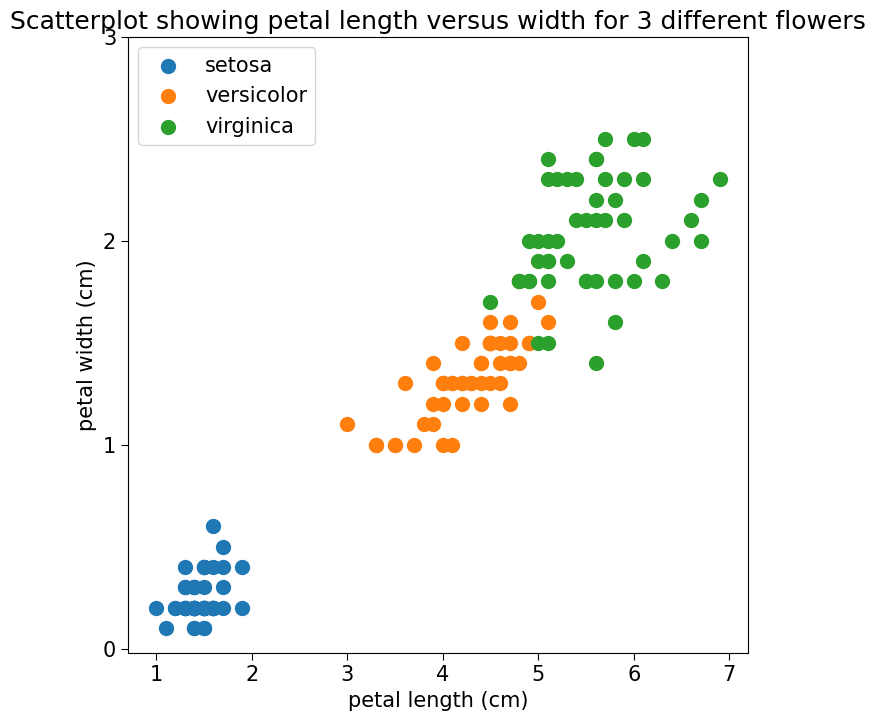

In [78]:
fig, ax = plt.subplots(figsize = [8,8]) # the figsize specifies the aspect ratio for the plotted image
ax.scatter(df["petal length (cm)"][df["species"] == 0], df["petal width (cm)"][df["species"] == 0]) #We are plotting petal length and petal width but we are placing the mask for only the flower data that belongs to the zeroth class
ax.scatter(df["petal length (cm)"][df["species"] == 1], df["petal width (cm)"][df["species"] == 1]) #We are plotting petal length and petal width but we are placing the mask for only the flower data that belongs to the first class
ax.scatter(df["petal length (cm)"][df["species"] == 2], df["petal width (cm)"][df["species"] == 2]) #Second class.

#This returns all the values plotted on the same graph. We could also opt to have these values separated onto different graphs (equally possible)
ax.legend(data.target_names) # There is a class within the data frame called target_names which is what we are using to show the different colors and what they would stand for. We can actively set the different colours to be what we would want for them to be
ax.set_yticks([0,1,2,3]) #This sets the ticks/ marked points on the y axis. 0, 5, 10, 15 etc You want to adjust this such that it does not misrepresent your data. Setting too big a y tick would result in your data being compressed to one corner of the graph hence present erroneous information

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.set_title("Scatterplot showing petal length versus width for 3 different flowers")

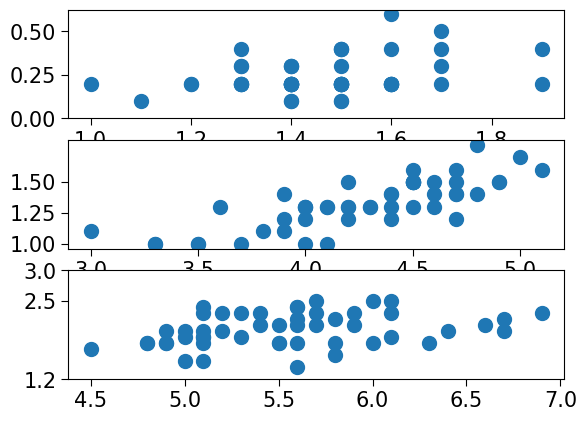

In [84]:
#This is how we could plot them separately though
fig, axs = plt.subplots(3) #We aim to make 3 subplots. Note that we are now using axs
axs[0].scatter(df["petal length (cm)"][df["species"] == 0], df["petal width (cm)"][df["species"] == 0])
axs[1].scatter(df["petal length (cm)"][df["species"] == 1], df["petal width (cm)"][df["species"] == 1])
axs[2].scatter(df["petal length (cm)"][df["species"] == 2], df["petal width (cm)"][df["species"] == 2])

axs[0].set_yticks([0,0.25,0.5])
axs[1].set_yticks([1,1.25,1.5])
axs[2].set_yticks([1.2, 3.0,2.5])
#There are more things that could be done here but you get the point

Text(0.5, 0.92, 'Scatterplot showing petal length versus width for 3 different flowers')

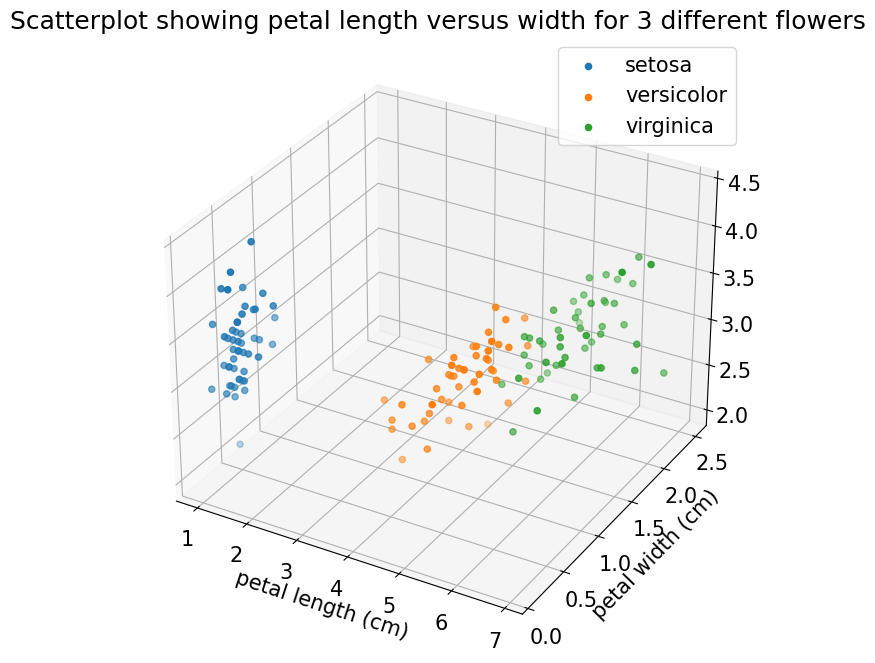

In [87]:
#Then we have the 3D scatterplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
ax.scatter(df["petal length (cm)"][df["species"] == 0], df["petal width (cm)"][df["species"] == 0], df["sepal width (cm)"][df["species"] == 0])

ax.scatter(df["petal length (cm)"][df["species"] == 1], df["petal width (cm)"][df["species"] == 1], df["sepal width (cm)"][df["species"] == 1])

ax.scatter(df["petal length (cm)"][df["species"] == 2], df["petal width (cm)"][df["species"] == 2], df["sepal width (cm)"][df["species"] == 2])

ax.legend(data.target_names)
ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.set_title("Scatterplot showing petal length versus width for 3 different flowers")



The second last pictorial we are going to look into is the box plot now. There are different methods to go about this but the seaborn library is what he is using

<AxesSubplot: xlabel='petal length (cm)'>

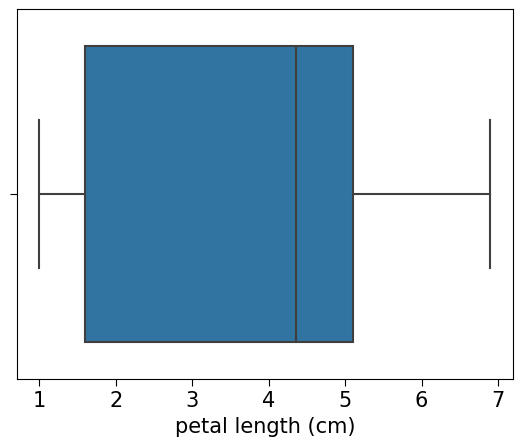

In [89]:
import seaborn as sns
sns.boxplot(x = df["petal length (cm)"])
#What does this even tell us? Worth thinking about later on
#That said, it seems like the seaborn library does not support much of the object oriented interface like matplotlib did.


<AxesSubplot: xlabel='species', ylabel='petal length (cm)'>

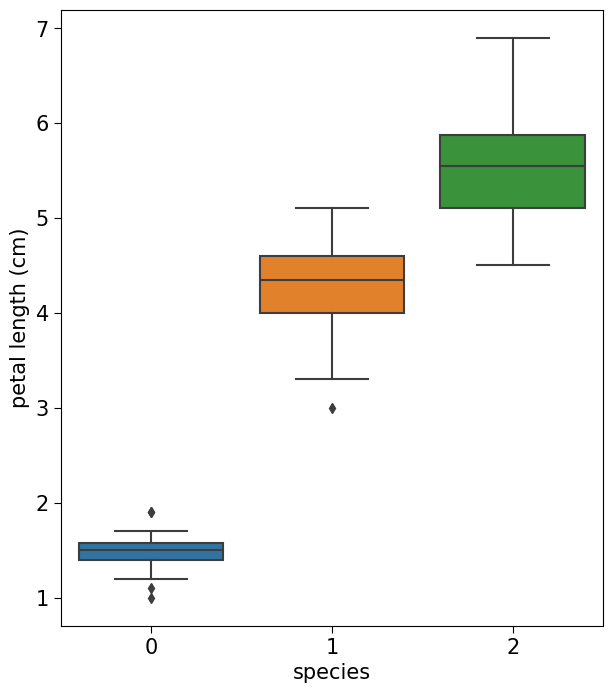

In [91]:
#An alternative plotting approach
fig = plt.figure(figsize=(7,8)) #The .figure method returns two variables that need object assignment - fig and ax (axes)
#This method can, however, be split into two - the .figure method which would only require the figure object be assigned and the .add_subplot() method which will now be assigned to the ax argument
sns.boxplot(y = df["petal length (cm)"], x = df["species"])
#This generates several boxplots for the three different kinds of classes available

The last thing that we are plotting today is the heatmap

<class 'pandas.core.frame.DataFrame'>
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm               1.00          -0.24               0.66   
bill_depth_mm               -0.24           1.00              -0.58   
flipper_length_mm            0.66          -0.58               1.00   
body_mass_g                  0.60          -0.47               0.87   

                   body_mass_g  
bill_length_mm            0.60  
bill_depth_mm            -0.47  
flipper_length_mm         0.87  
body_mass_g               1.00  


C:\Users\User\AppData\Local\Temp\ipykernel_16516\1303693101.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


[Text(0.5, 1.0, 'Correlation for penguin attributes')]

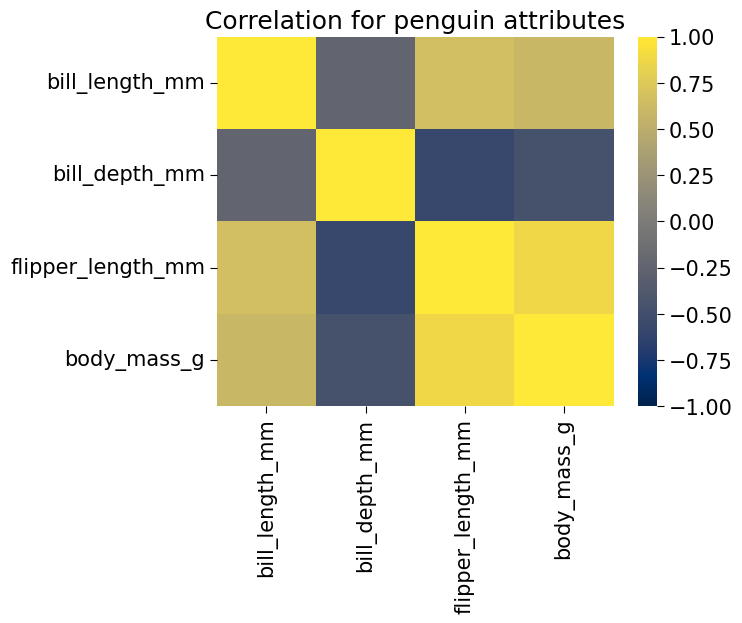

In [98]:
#The first thing we learn is how to read datasets from the seaborn package. It seems like scipy is not the only package with datasets in it
df = sns.load_dataset("penguins") #In this case, we have already imported seaborn as sns. load_datasheet() is, therefore, a method inside seaborn that when given the argument of the file name, loads it
df # When run, this is a dataset made of 344 rows and 7 columns highlighting the species type, the island, the bill length in mm, bill depth in mm, flipper length in mm, body mass in grams and finally, the sex of the penguin
print(type(df)) #This returns a pandas dataframe. This is great because now we can manipulate this data using all the pandas methods
matrix = df.corr().round(2)
print(matrix) # Again, this returns a table showing how the different elements are correlated. This is now what we lift and place on the heatmap to try and understand where it is that we have the strongest correlation

sns.heatmap(matrix, annot=False, vmax = 1, vmin = -1, center = 0, cmap = "cividis").set(title = "Correlation for penguin attributes")
#The annot = True is very important since it is the one that puts all the different labels onto the heatmapt to help us make more sense of it. So, the x and y labels appear automatically. The annotation adds values into the boxes to to show the correlation coefficient. The vmax and vmin are the values to anchor the color choice for the data. If these are not provided, the method will look into the data and decide on its own how to assign the colors. 

#The cmap is for choosing different color maps. There is a wide array of them. Source: https://matplotlib.org/stable/tutorials/colors/colormaps.html